In [51]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
def log_int_iterator(start, end, step):
    i = start
    while i <= end:
        yield int(i)
        i *= step

In [44]:
def range_stat(x):
    return x.max() - x.min()

In [24]:
mu = 0
sigma_1 = 1
sigma_2 = 5

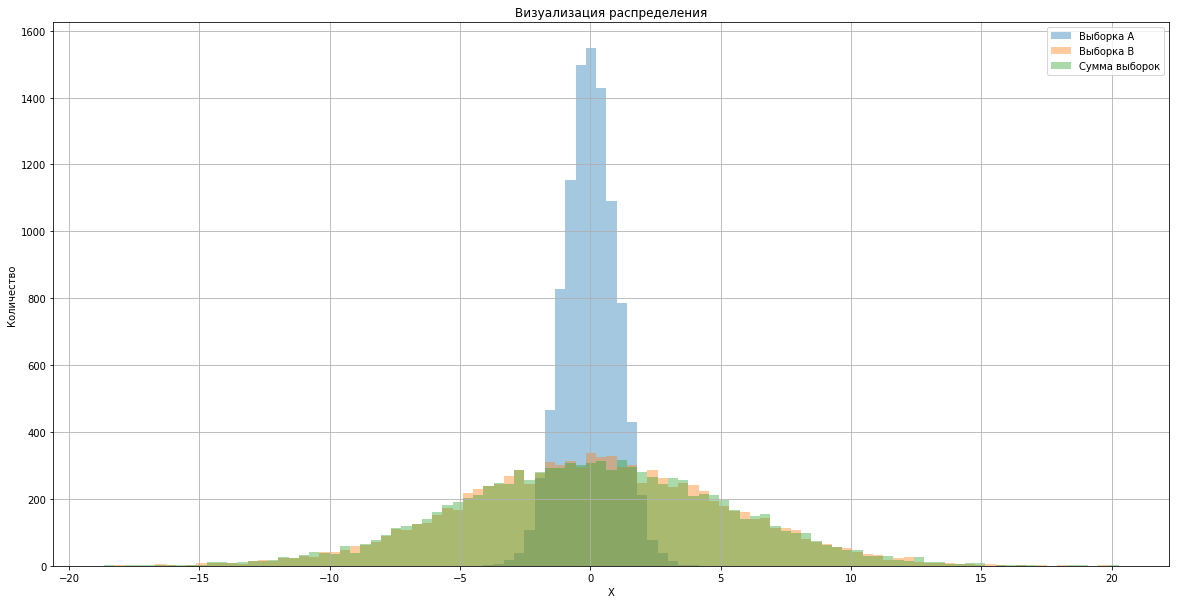

In [55]:
N = 10000
A = np.random.normal(mu, sigma_1, N)
B = np.random.normal(mu, sigma_2, N)
C = A + B 
bins = np.linspace(C.min(), C.max(), int(np.sqrt(N)))
alpha=0.4
plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('Визуализация распределения')
plt.hist(A, bins, alpha=alpha, label="Выборка A")
plt.hist(B, bins, alpha=alpha, label="Выборка B")
plt.hist(C, bins, alpha=alpha, label="Сумма выборок")
plt.xlabel('X')
plt.ylabel('Количество')
plt.legend()
plt.show()

In [61]:
result = pd.DataFrame(columns=['Median A', 'Median B', 'Median C',
                               'Range A', 'Range B', 'Range C',
                               'Mean A', 'Mean B', 'Mean C',
                               'Var A', 'Var B', 'Var C',])
for N in log_int_iterator(10, 10240, 2):
    np.random.seed(42)
    A = np.random.normal(mu, sigma_1, N)
    B = np.random.normal(mu, sigma_2, N)
    C = A + B    
    result.loc[N] = [np.median(A), np.median(B), np.median(C),
                    range_stat(A), range_stat(B), range_stat(C),
                    A.mean(), B.mean(), C.mean(),
                    np.var(A), np.var(B), np.var(C)]
result

,Median A,Median B,Median C,Range A,Range B,Range C,Mean A,Mean B,Mean C,Var A,Var B,Var C
10,0.519637,-3.675779,-3.265259,2.048687,11.137638,11.197414,0.448061,-3.953291,-3.505230,0.470467,12.836598,12.763909
20,-0.234145,-1.293675,-1.091527,3.492493,19.059742,18.279764,-0.171299,-1.329876,-1.501174,0.875572,22.256100,21.742959
40,-0.234145,0.128053,0.043479,3.811948,20.921944,21.818642,-0.218637,-0.145217,-0.363854,0.885149,22.687678,21.953191
80,-0.126956,0.321983,-0.010149,4.472023,21.910067,21.454062,-0.123840,-0.056817,-0.180657,0.905314,20.787132,21.597910
160,-0.030613,0.577112,0.504393,5.082987,35.469994,34.049669,-0.067602,0.458120,0.390518,0.871563,24.587819,24.944646
320,0.062255,-0.076900,-0.054921,7.093999,27.752627,27.033255,0.012011,-0.111188,-0.099177,0.933876,24.645454,25.339548
640,0.015710,0.388643,0.325998,7.093999,27.643187,28.649230,-0.005113,0.422170,0.417056,0.960140,24.682582,25.164052
1280,0.047190,0.072403,0.055264,7.093999,31.063099,32.789337,0.039660,0.142662,0.182323,0.975726,24.329218,25.223946
2560,0.027533,-0.033916,0.013502,7.093999,35.514708,36.351354,0.034096,-0.106276,-0.072179,0.974479,25.248429,26.127129
5120,0.014211,-0.096101,-0.086157,7.167505,37.257277,39.200944,0.006421,-0.064900,-0.058479,0.992974,25.495770,26.512258


Медиана и среднее значение при увеличении размера выборки все ближе приближаются к среднему создаваемой выборки.
Это происходит, так как данных становится все больше и случайные помехи вносят меньший вклад.

При этом разброс выборок увеличивается с ростом числа итераций, так как вероятность встретить выброс увеличивается с ростом чистла записей.

Выборочная дисперсия на больших выборках приближается к коэффициенту дисперсии создаваемой выборки.